### 사전준비

In [1]:
#기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 합성곱신경망 이미지 분류

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

In [5]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled.shape

(60000, 28, 28, 1)

In [6]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [9]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)


(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


#### 합성곱 신경망 생성

In [12]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))  # 14x14 특성맵 = 32
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))  # 7X7 특성맵 = 64

In [14]:
model.add(keras.layers.Flatten())  # 7X7X64 = 3136
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))  # 60개 노드만 통과
model.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

In [16]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


#### 모델 컴파일 훈련

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_cnn_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True, verbose=1)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.5086 - accuracy: 0.8174
Epoch 1: val_loss improved from inf to 0.31861, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 48s 32ms/step - loss: 0.5084 - accuracy: 0.8175 - val_loss: 0.3186 - val_accuracy: 0.8807
Epoch 2/20
1500/1500 [==============================] - ETA: 0s - loss: 0.3336 - accuracy: 0.8809
Epoch 2: val_loss improved from 0.31861 to 0.30953, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.3336 - accuracy: 0.8809 - val_loss: 0.3095 - val_accuracy: 0.8862
Epoch 3/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.2844 - accuracy: 0.8967
Epoch 3: val_loss improved from 0.30953 to 0.24487, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 37s 24ms/step - loss: 0.2843 - accuracy: 0.8967 - val_loss: 0.2449 - val_accuracy: 0.9114
Epoch 4/20
1498/1500 [====

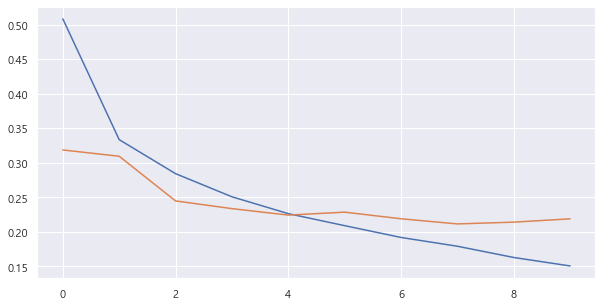

In [18]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [19]:
early_stopping_cb.stopped_epoch

9

In [20]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 11ms/step - loss: 0.2116 - accuracy: 0.9225


[0.21156521141529083, 0.9225000143051147]

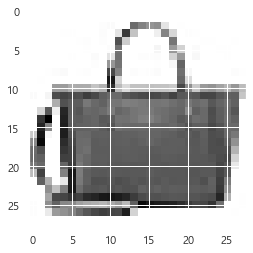

In [21]:
plt.imshow(X=val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [22]:
# 예측
result = model.predict(val_scaled[0:1])
result

1/1 [==============================] - 0s 110ms/step


array([[1.8282341e-17, 1.8018201e-25, 3.0184292e-22, 1.0913543e-19,
        5.0396377e-19, 3.8548982e-18, 9.1661764e-20, 8.1653808e-22,
        1.0000000e+00, 5.1702677e-24]], dtype=float32)

In [24]:
val_labels = np.argmax(model.predict(val_scaled[0:1]), axis=-1)
val_labels

1/1 [==============================] - 0s 91ms/step


array([8], dtype=int64)

In [25]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클부츠']

In [26]:
print(classes[np.argmax(result)])

가방
